# The Best Neighborhood: Cleaning Up the Streets
### Team Gr8: Daulton Cipicchio, Evan Kozierok, and Matt Muir

---
## Introduction
For our Big Ideas final project, we were tasked to determine which neighborhood of Pittsburgh is the best using some metric of our choice, analyzing data retrieved from the Western Pennsylvania Regional Data Center.

We wanted to create a mix of silly and serious in our datasets, so we began searching through the WPRDC dataset collections to search for interesting datasets. Early on we found an archive of police reports which we were confident was a good dataset - it was large, detailed, generally well-maintained, and most importantly, it included what neighborhood each crime took place in. 

However, not all the datasets were as good - some were unusably small, and many had location input by latitude/longitude coordinates or U.S. Census tracts. Since the borders of neighborhoods are not defined simply and many tracts cross neighborhood borders, we were unable to use these datasets. In the end, we had to give up on many promising datasets such as air quality, number of trees, and number of steps in public stairways. But in the end, we came up with our metric to determine which neighborhood kept their streets clean - in more ways than one.


---
## The Metric
We chose to use three data sets to determine the best neighborhood: crime rates, population, and the total number of smart trash containers present in each neighborhood. 

In [1]:
import pandas as pd
import numpy
police = pd.read_csv("Police-Blotter.csv")
population = pd.read_csv("population_data.csv")
smart_trash = pd.read_csv("Smart-Containers.csv")

We first found the total number of reports for every neighborhood in the police dataset, and then we divided this by the population in each neighborhood from the 2010 census. This helped us find the average amount of crimes committed per person in each neighborhood.

In [2]:
crimesPerNeighborhood = police['INCIDENTNEIGHBORHOOD'].value_counts()
crimesFrame = pd.DataFrame(crimesPerNeighborhood)
crimesFrame['Neighborhood'] = list(crimesFrame.index)
crimesFrame.head()

,INCIDENTNEIGHBORHOOD,Neighborhood
South Side Flats,11726,South Side Flats
Central Business District,8854,Central Business District
Carrick,6605,Carrick
Bloomfield,5532,Bloomfield
Shadyside,5109,Shadyside


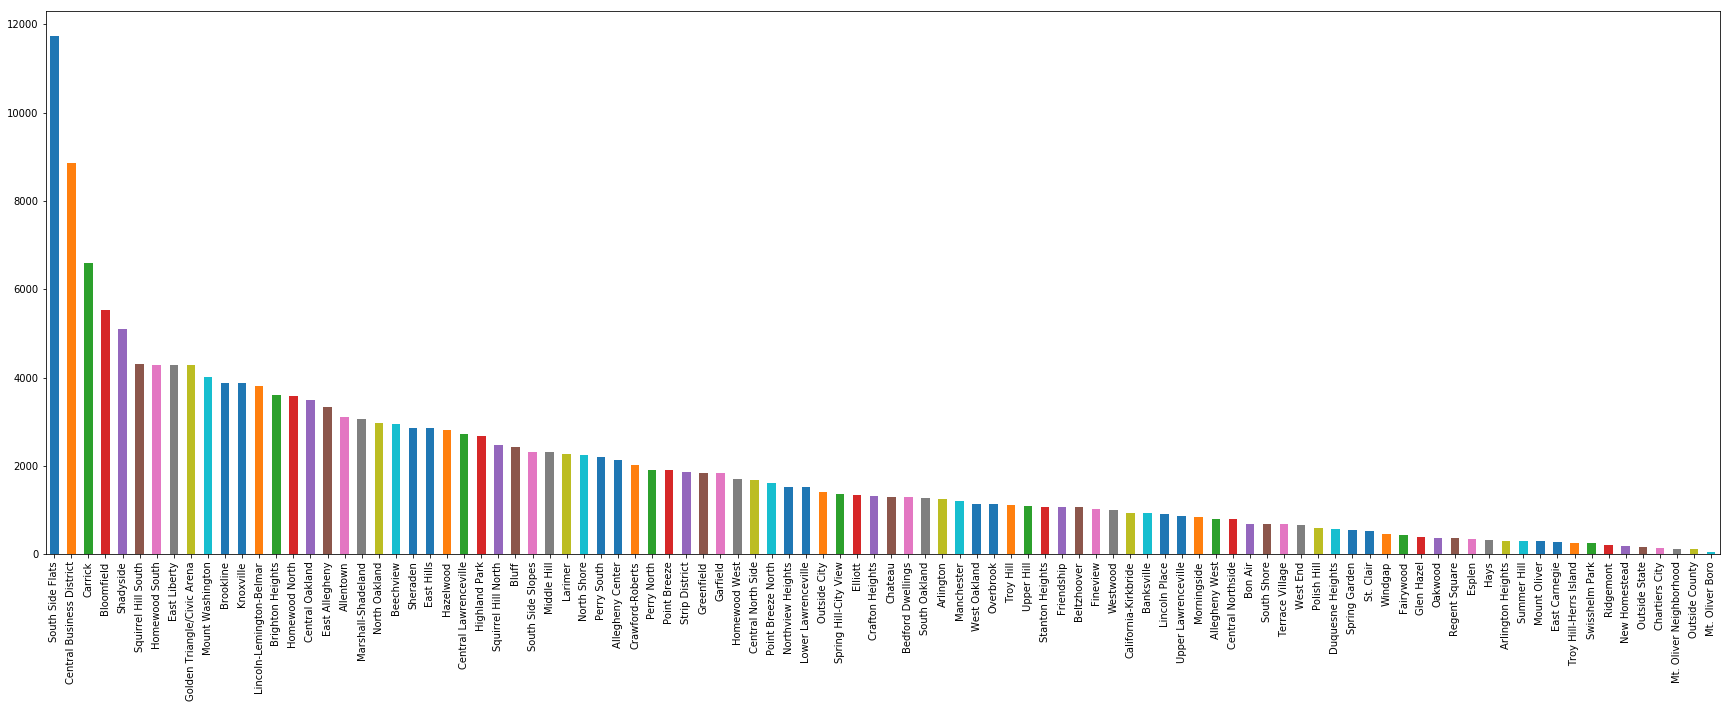

In [6]:
crimesPerNeighborhood.plot.bar(figsize=(30,10))

This is a very big graph but as you can see we have a few neighborhoods with a lot of crime - South Side Flats and Central Business District in particular - and a long tail of neighborhoods with much less crime. However not all of these have the same population which we account for by making a ratio based off of population.

In [9]:
pops = population.loc[:, ['Neighborhood','Population (2010)']]
crimeFrame = pd.DataFrame(crimesPerNeighborhood)
crimeFrame.head()
ratio = pd.merge(crimesFrame, pops, how='inner', left_on='Neighborhood', right_on='Neighborhood')
count = 0
for x in ratio['Population (2010)']:
    ratio['Population (2010)'][count] = x.replace(',','')
    count = count+1

ratio['Population (2010)'] = ratio['Population (2010)'].astype(int)
ratio['rat'] = ratio['INCIDENTNEIGHBORHOOD']/ratio['Population (2010)']
ratio = ratio.sort_values(by='rat')
ratio.head(10)

/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,INCIDENTNEIGHBORHOOD,Neighborhood,Population (2010),rat
85,244,Swisshelm Park,1361,0.179280
87,188,New Homestead,990,0.189899
69,675,Terrace Village,3228,0.209108
25,2475,Squirrel Hill North,11363,0.217812
61,932,Banksville,4144,0.224903
55,1064,Stanton Heights,4601,0.231254
72,581,Duquesne Heights,2425,0.239588
64,839,Morningside,3346,0.250747
37,1837,Greenfield,7294,0.251851
66,786,Central Northside,2923,0.268902


Because Pandas is confused/confusing, here `INCIDENTNEIGHBORHOOD` is actually the number of crimes reported. We can see from the value `rat` that Swisshelm Park and New Homestead have the lowest ratios of crimes/person. In case you're wondering which neighborhoods have the highest crime rates, here are the 5 highest and lowest displayed graphically, just for kicks:

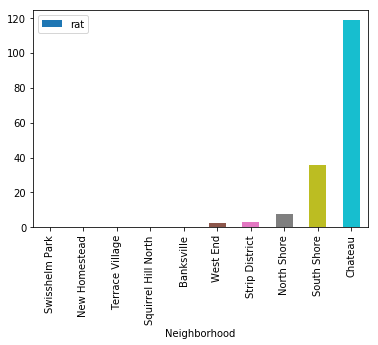

In [32]:
ratio.iloc[[0,1,2,3,4,-5,-4,-3,-2,-1]].plot.bar(x='Neighborhood',y='rat')

Don't go to Chateau I guess.... 

The "Smart" trash bins contain sensors that detect when a can needs to be emptied and lets the proper people/departments know. This would help the neighborhood be cleaner, as there is a much smaller chance for the trash containers to overflow. We found the total amount of containers in each neighborhood so we could compare it to the crime rate.

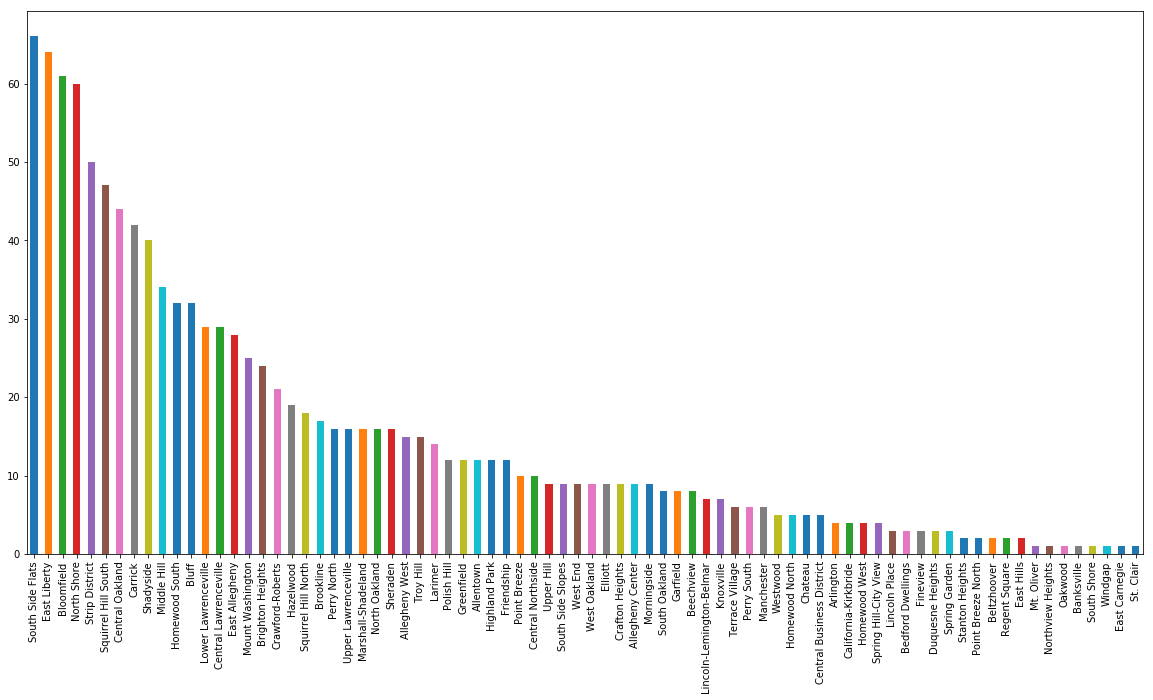

In [34]:
counted_values = smart_trash['neighborhood'].value_counts()
counted_values.plot.bar(figsize=(20,10))

In [43]:
counted_values.head()

South Side Flats    66
East Liberty        64
Bloomfield          61
North Shore         60
Strip District      50
Name: neighborhood, dtype: int64

Interestingly, South Side Flats had both the largest number of crimes and smart trash cans.

Once we had both of these datasets sorted, we merged them together divided the number of smart trash cans by the number of crimes per person. The best neighborhoods would be ones that have the largest number, as this would show that they are keeping trash and crime off of their streets. This metric provides important information about the safety and environment of a neighborhood. Note that only neighborhoods that were in both datasets were evaluated.

In [69]:
cv_frame = pd.DataFrame({"Neighborhood" : counted_values.index.tolist(), "Cans" : counted_values.values})
cv_frame.head()

,Neighborhood,Cans
0,South Side Flats,66
1,East Liberty,64
2,Bloomfield,61
3,North Shore,60
4,Strip District,50


In [86]:
final_metric = pd.merge(ratio, cv_frame, how='inner', on='Neighborhood')
final_metric["Final Ratio!"] = final_metric.Cans / final_metric.rat
final_metric = final_metric.sort_values(by="Final Ratio!", ascending = False)

---
## The Best Neighborhood
It is time to announce the best neighborhood. The winner of best neighborhood is...

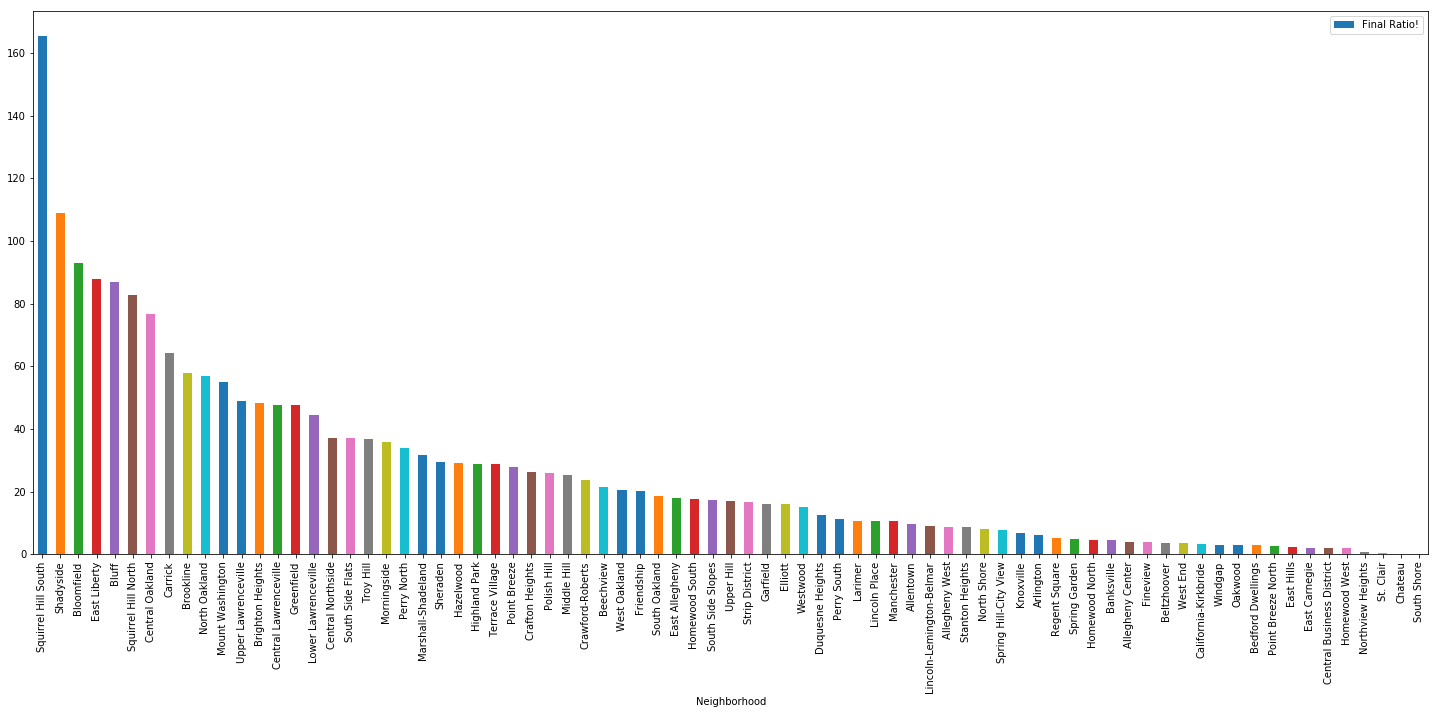

In [88]:
final_metric.plot.bar(x="Neighborhood",y="Final Ratio!",figsize=(25,10))

### Squirrel Hill South!
Congratulations to the residents of Squirrel Hill, which took both 1st and 6th place with Squirrel Hill South and North respectively. And the data clearly shows that you should never go to Chateau or South Shore.

In [104]:
final_metric.head(6)

,INCIDENTNEIGHBORHOOD,Neighborhood,Population (2010),rat,Cans,Final Ratio!
10,4298,Squirrel Hill South,15110,0.284447,47,165.232666
18,5109,Shadyside,13915,0.367158,40,108.944999
48,5532,Bloomfield,8442,0.655295,61,93.087852
50,4282,East Liberty,5869,0.729596,64,87.719757
19,2427,Bluff,6600,0.367727,32,87.021014
1,2475,Squirrel Hill North,11363,0.217812,18,82.640000


Interestingly, Squirrel Hill South did not have the highest number of trash cans or the lowest crime ratio. As a matter of fact, Squirrel Hill South actually had the 6th highest number of crimes among the neighborhoods, and was only ranked 6th for number of smart trash cans. However, because it was the most populated neighborhood, it was able to make up for the higher crime number and its healthy proportion of trash cans pushed it to the top. The story looks similar with Shadyside, which also happened to be 2nd largest in terms of population.

In [107]:
final_metric.sort_values(by='Population (2010)', ascending=False).head(6)

,INCIDENTNEIGHBORHOOD,Neighborhood,Population (2010),rat,Cans,Final Ratio!
10,4298,Squirrel Hill South,15110,0.284447,47,165.232666
18,5109,Shadyside,13915,0.367158,40,108.944999
11,3886,Brookline,13214,0.294082,17,57.806999
1,2475,Squirrel Hill North,11363,0.217812,18,82.640000
8,2973,North Oakland,10551,0.281774,16,56.783047
47,6605,Carrick,10113,0.653120,42,64.306737


---
## Conclusions
__Evan:__ To be perfectly honest, I really haven't lived in Pittsburgh for long enough to have any real personal ranking of the neighborhoods. However, I was in Squirrel Hill South once because I went to Frick Park in September and it seemed very nice and was generally a very pretty and calm place. Therefore I think our metric must be doing *something* right. I also hear Shadyside is in fact nice and I have also heard some less than pleasant things about South Shore but I can't speak from experience there.